### <left><b><font size=4>Section 3 – Unsupervised Learning – Clustering<b><left>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
# from sklearn.decomposition import PCA
import umap

# Clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

In [2]:
# if not os.path.isfile("ssh_attacks_decoded_splitted.parquet"):
#     raise Exception("You should run the preprocessing file")
# df = pd.read_parquet("ssh_attacks_decoded_splitted.parquet")

<div style="text-align: justify">Cluster the attacks according to their characteristics. Choose at least 2 Clustering Algorithms, and for each of them solve the following points.</div>

In [3]:
# if not (os.path.isfile("df_features_bow.parquet") and os.path.isfile("df_features_tfidf.parquet")):
#     raise Exception("You should run the section 1 before")
# df_features_bow = pd.read_parquet("df_features_bow.parquet")
# df_features_tfidf = pd.read_parquet("df_features_tfidf.parquet")

In [2]:
if not (os.path.isfile("df_features_bow_sampled.parquet") and os.path.isfile("df_features_tfidf_sampled.parquet")):
    raise Exception("You should run the section 1 before")
df_features_bow_sampled = pd.read_parquet("df_features_bow_sampled.parquet")
df_features_tfidf_sampled = pd.read_parquet("df_features_tfidf_sampled.parquet")

In [3]:
X = df_features_tfidf_sampled.drop(columns=["Set_Fingerprint"])

In [91]:
X

,enable,system,sh,cat,proc,mounts,bin,busybox,cd,dev,...,awk,print,free,which,crontab,top,passwd,mv,nohup,tsm
170871,0.086522,0.0,0.130895,0.0,0.0,0.0,0.160000,0.000000,0.0,0.0,...,0.000000,0.0,0.388253,0.043175,0.0,0.129794,0.0,0.475538,0.000000,0.043269
88992,0.071382,0.0,0.107990,0.0,0.0,0.0,0.132002,0.000000,0.0,0.0,...,0.000000,0.0,0.320313,0.035619,0.0,0.107081,0.0,0.392324,0.000000,0.035697
230337,0.086522,0.0,0.130895,0.0,0.0,0.0,0.160000,0.000000,0.0,0.0,...,0.000000,0.0,0.388253,0.043175,0.0,0.129794,0.0,0.475538,0.000000,0.043269
138803,0.086522,0.0,0.130895,0.0,0.0,0.0,0.160000,0.000000,0.0,0.0,...,0.000000,0.0,0.388253,0.043175,0.0,0.129794,0.0,0.475538,0.000000,0.043269
191558,0.079382,0.0,0.120093,0.0,0.0,0.0,0.146797,0.000000,0.0,0.0,...,0.000000,0.0,0.356213,0.039612,0.0,0.119083,0.0,0.436295,0.000000,0.039698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171360,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
166018,0.000000,0.0,0.099894,0.0,0.0,0.0,0.045790,0.318229,0.0,0.0,...,0.088489,0.0,0.148151,0.000000,0.0,0.000000,0.0,0.395907,0.477025,0.000000
132486,0.000000,0.0,0.123187,0.0,0.0,0.0,0.028234,0.196216,0.0,0.0,...,0.054561,0.0,0.121797,0.000000,0.0,0.000000,0.0,0.457709,0.294128,0.000000
171506,0.000000,0.0,0.127276,0.0,0.0,0.0,0.029171,0.101364,0.0,0.0,...,0.000000,0.0,0.157300,0.000000,0.0,0.000000,0.0,0.504428,0.000000,0.000000


<div style="text-align: justify"> Two clustering algorithms will be implemented to our dataset, the chosen were MiniBatchK-Means and Gaussian Mixture Model (GMM). <br>
First of all we have to select the features to be evaluate, <b>'Pricipal Component Analysis (PCA)'</b> was used to reduce the dimensionality of the data.</div>


What are these parameters? 
- **Silhouette**: is a score that measures how similar is an object to its own cluster, compared to other clusters.
              The range of values that the Silhouette can assume is from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, so a good clustering structure.


- **RI(Rand Index)**:  is a measure of similarity among two clusterings. The range of values that Rand Index can assume is from 0 to 1,                     where a value of 1 indicates perfect similarity between two clusterings and a value of 0 indicates no similarity.


- **ARI(Adjusted Rand Index)**: it'a a way to "correct" the RI, a sort of normalization of it.
                                ARI ranges from -1 to 1, where a value close to 1 indicates strong agreement between two clusterings, a value close to 0 indicates random clustering, and negative values indicate disagreement.



**3.1. Determine the number of clusters: This can be done using methods like the elbow method or
silhouette analysis. Explain your reasoning.**

<div style="text-align: justify"> The clustering error is strongly dependent form the number of cluster. 
The best situation, with the lowest error possible, is obiuously when we have the same number of clusters of the datapoins. Actually in this situation we're not even performing clustering, but the clustering error will be zero.<br>
<br>
Now we want to find the number of clusters that gives us the best results, so with the lowest clustering error. 
We'll follow 2 approches for each clustering algorithm applied, elbow method and validation error. </div>

#### K-Means Algorithm

In [29]:
# Step 1: Elbow Method  (260 sec)
n_cluster_list=[]
inertia_list=[]
silhouette_list = []
ri_list = []
ari_list = []

for n_clusters in range(3, 17):
    kmeans_new = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans_new.fit_predict(X)
      
    # Rand Index and Adjusted Rand Index:
    # ri_list.append(rand_score(np.ravel(labels), cl_labels))
    # ari_list.append(adjusted_rand_score(np.ravel(labels), cl_labels))
    
    # Unsupervised metric  (it takes approx 2500 sec o 3000 sec)
    silhouette_value= silhouette_score(X, kmeans_new.labels_)
    silhouette_list.append(round(silhouette_value,2))

    # For Elbow Method (Inertia):
    inertia_list.append(kmeans_new.inertia_)
    n_cluster_list.append(n_clusters)


**Elbow Method**

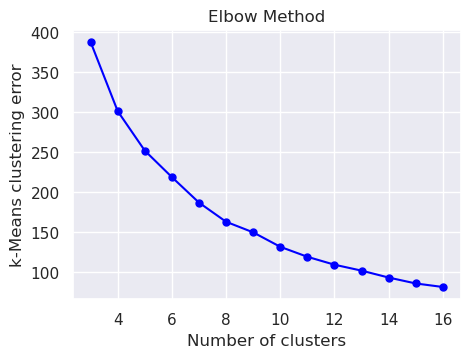

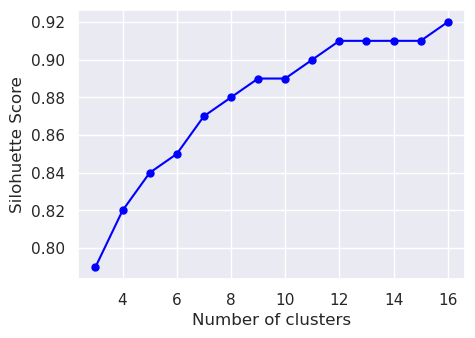

Size of each cluster:  [2567 2096  441  133   57  239   23   72   61   35   18   19   23   10
   42   17]


In [32]:
# Step 3
# Plot k-Means clustering error 
# Set up Seaborn style
sns.set(style="darkgrid")

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, inertia_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

(unique, counts) = np.unique(kmeans_new.labels_, return_counts=True)
print("Size of each cluster: ", counts)

#### Gaussian Mixture Model Algorithm (GMM)

In [41]:
n_cluster_list=[]
silhouette_list_gmm= []
log_l_list=[]

for n_clusters in range(3, 17):
    gmm = GaussianMixture(n_components = n_clusters)
    gmm_label = gmm.fit_predict(X)
    
    #ri_list.append(rand_score(np.ravel(labels), cl_labels))
    #ari_list.append(adjusted_rand_score(np.ravel(labels), cl_labels))
    
    silhouette_value = silhouette_score(X, gmm_label)
    silhouette_list_gmm.append(round(silhouette_value,2))
    
    log_l_list.append(gmm.score(X))
    n_cluster_list.append(n_clusters)

**Elbow Method**

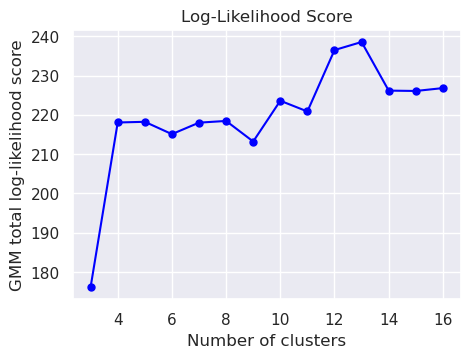

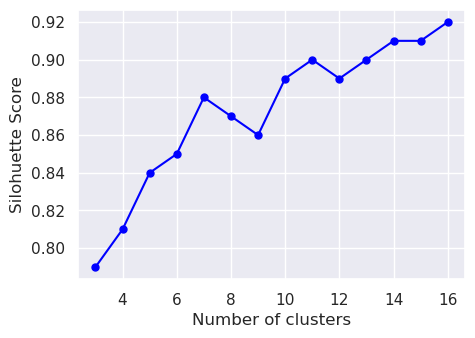

Effetive size of each cluster:  [0.43874936 0.07534598 0.36186571 0.00427131 0.04049206 0.02135657
 0.00854263 0.01042201 0.01230138 0.00307535 0.00597984 0.00273364
 0.00307535 0.00170853 0.00290449 0.00717581]


In [44]:
#3. Has the performance improved also on the other metrics? Plot the other metrics for the different values of n_cluster.
# Set up Seaborn style
sns.set(style="darkgrid")

# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, log_l_list, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.title('Log-Likelihood Score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list_gmm, marker='o', markersize=5, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

# report effective size
print("Effetive size of each cluster: ", gmm.weights_)


**3.2. Tune other hyper-parameters, if any.**

##### Tunning the hyper-parameter of K-Means

In [54]:
# Step 1: Elbow Method
n_cluster_list=[]
inertia_list=[]
silhouette_list_tuning = []

for n_clusters in range(3, 17):
    # Selecting the number of optimal clusters = 9
    # 'k-means++': is an initialization that tends to converge faster than 'random'
    # Random State: It ensures that the initialization of centroids is reproducible (to obtaine same results in ech run)
    # n_init: determines the number of times the KMeans algorithm will be run with different centroid seeds.
    kmeans_tunning = KMeans(n_clusters = n_clusters, init ='k-means++', random_state = 42, n_init = 1)
    labels_tunning = kmeans_tunning.fit_predict(X)   # Using the features selected
    
    # Rand Index and Adjusted Rand Index:
    # ri_list.append(rand_score(np.ravel(labels), labels_tunning))
    # ari_list.append(adjusted_rand_score(np.ravel(labels), labels_tunning))
    
    # For Elbow Method (Inertia):
    silhouette_value = silhouette_score(X, labels_tunning)
    silhouette_list_tuning.append(round(silhouette_value, 2))
    
    inertia_list.append(kmeans_tunning.inertia_)
    n_cluster_list.append(n_clusters)

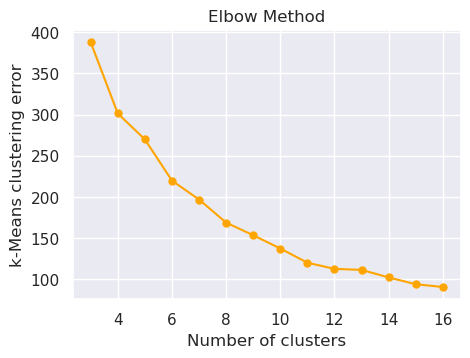

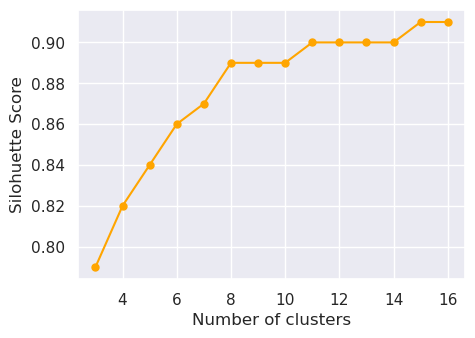

Size of each cluster:  [2598 2117  439    7  125  241   26   61   23   17   17   52   65   10
   42   13]


In [55]:
# Step 3
# Plot k-Means clustering error 
# Set up Seaborn style
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, inertia_list, marker='o', markersize=5, color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.title('Elbow Method')
plt.show()


plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list_tuning, marker='o', markersize=5, color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

(unique, counts) = np.unique(kmeans_tunning.labels_, return_counts=True)
print("Size of each cluster: ", counts)


##### Tunning the hyper-parameters of GMM 

In [56]:
n_cluster_list=[]
silhouette_list_tuning_gmm = []
ri_list = []
ari_list = []
log_l_list=[]

for n_clusters in range(3, 17):
    # The number of components was set in 16, the optimal number of cluster found was 9
    # covariance_type='full': Each component has its own general covariance matrix.
    # random_state: It ensures that if you run the GMM algorithm multiple times, 
    #               you will get the same initial conditions.
    # init_params='kmeans': controls the initialization method for the algorithm
    gmm_tuning = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42, init_params='kmeans')
    gmm_labels = gmm.fit_predict(X)
    
    # For Elbow Method (Inertia):
    silhouette_value = silhouette_score(X, gmm_labels)
    silhouette_list_tuning_gmm.append(round(silhouette_value, 2))
    
    #ri_list.append(rand_score(np.ravel(labels), cl_labels))
    #ari_list.append(adjusted_rand_score(np.ravel(labels), cl_labels))
    log_l_list.append(gmm.score(X))
    n_cluster_list.append(n_clusters)

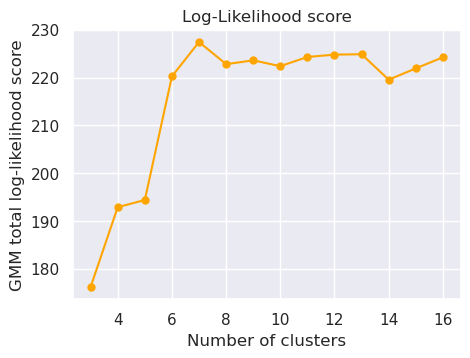

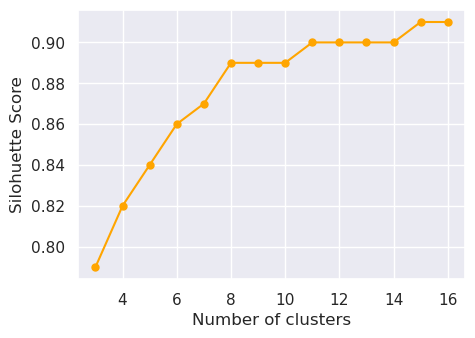

Size of each cluster:  [2597 2118  439    7  125  241   26   61   23   17   17   52   65   10
   42   13]


In [58]:
#3. Has the performance improved also on the other metrics? Plot the other metrics for the different values of n_cluster.
# Set up Seaborn style
sns.set(style="darkgrid")

# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, log_l_list, marker='o', markersize=5, color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.title('Log-Likelihood score')
plt.show()   


plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list, silhouette_list_tuning_gmm, marker='o', markersize=5, color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Silohuette Score')
plt.title('')
plt.show()

(unique, counts) = np.unique(gmm_tuning, return_counts=True)
print("Size of each cluster: ", counts)

# Plot RI
# plt.figure(figsize=(5, 3.5))
# plt.plot(n_cluster_list, ri_list, marker='o', markersize=5, color='orange')
# plt.xlabel('Number of clusters')
# plt.ylabel('RI')
# plt.title('Rand Index Analysis')
# plt.show()

# # Plot ARI
# plt.figure(figsize=(5, 3.5))
# plt.plot(n_cluster_list,ari_list, marker='o', markersize=5, color='orange')
# plt.xlabel('Number of clusters')
# plt.title('Adjusted Rand Index')
# plt.ylabel('ARI')
# plt.show()

**3.3. Visualize the clusters through t-SNE visualization.**

Let's apply the k-mean clustering algorithm with the best hyper-parameters found, using the optimal number of cluster.

**K-Means Algorithm**

In [131]:
from sklearn.manifold import TSNE

optimal_clusters = 6
kmeans = KMeans(n_clusters = optimal_cluster, init ='k-means++', random_state = 42, n_init = 1)
cl_labels3 = kmeans.fit_predict(X) # Using the features selected


The goal of t-SNE is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane.

In [89]:
# Just in case, you run the belowe column twice creating two columns for cluster column
#X = X.drop(['cluster','Cluster'], axis=1)

In [99]:
df_cluster = pd.DataFrame(X)
df_cluster['cluster'] = cl_labels3

In [96]:
component = df_cluster.iloc[:,:-1]
#print(component)
tsne = TSNE(n_components=2).fit_transform(component)

df_tsne = pd.DataFrame(tsne)
df_tsne["cluster"] = cl_labels3
df_tsne.columns = ["x1", "x2", "cluster"]
df_tsne

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x1,x2,cluster
0,-19.489933,-4.326543,0
1,12.829847,-11.481812,0
2,-16.383886,0.071397,0
3,-15.377838,-1.206028,0
4,-15.410034,-16.848339,0
...,...,...,...
5848,26.334909,-9.993216,5
5849,33.250122,-13.672377,5
5850,33.233440,-13.710857,3
5851,33.109661,-13.750979,3


(-60.0, 50.0)

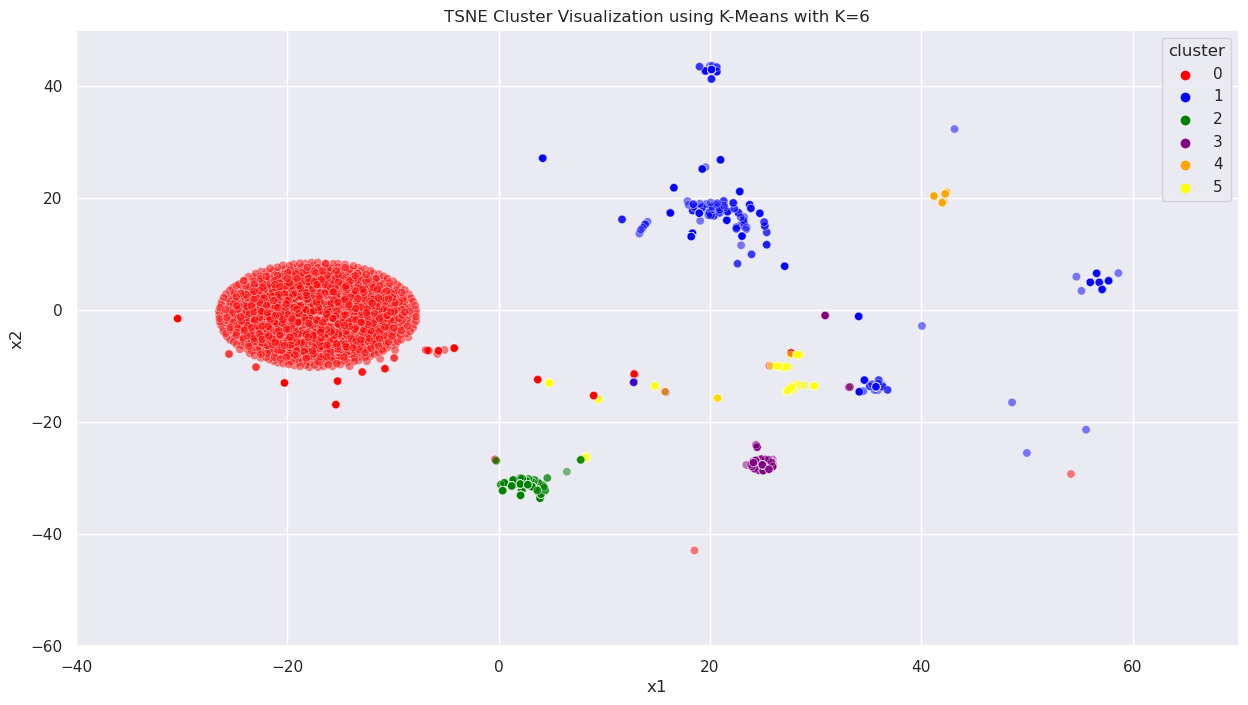

In [128]:
fig, ax = plt.subplots(figsize=(15,8))
#custom color palette, to distinguish beter the clusters
cluster_colors = ["red", "blue", "green", "purple", "orange", "yellow"] #"brown", "teal", "black"]

sns.scatterplot(data=df_tsne, x='x1', y='x2', hue='cluster',  palette=cluster_colors, legend="full", alpha=0.5)
ax.set_title('TSNE Cluster Visualization using K-Means with K=6')

ax.set_xlim([-40, 70])  
ax.set_ylim([-60, 50])  

**GMM Algortihm**

In [118]:
# Fit KMeans with the optimal number of clusters
optimal_clusters_gmm = 6
gmm_final = GaussianMixture(n_components = optimal_clusters_gmm, covariance_type='full', random_state=42, init_params='kmeans')
# BEAWARE: use df_cluster.iloc[:,:-1] to exclude the cluster column assigned by k-means, created before
labels_gmm_final = gmm_final.fit_predict(df_cluster.iloc[:,:-1])
    
# Add cluster labels to the DataFrame
df_cluster['cluster_gmm'] = labels_gmm_final

In [121]:
# Excluding the last two columns corresponding to the cluster assigned by k-meand and gmm
component_1 = df_cluster.iloc[:,:-2]
#print(component)
tsne_1 = TSNE(n_components=2).fit_transform(component_1)

df_tsne_gmm = pd.DataFrame(tsne_1)
df_tsne_gmm["cluster"] = labels_gmm_final
df_tsne_gmm.columns = ["x1", "x2", "cluster"]
df_tsne_gmm

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x1,x2,cluster
0,21.155994,-1.961587,0
1,-8.206037,11.933731,0
2,13.935523,-6.283780,0
3,15.373276,2.717505,0
4,20.177773,16.853415,0
...,...,...,...
5848,-5.696249,10.459527,5
5849,-41.644650,-6.626252,5
5850,-41.677189,-6.611415,3
5851,-41.598736,-6.552215,3


(-60.0, 50.0)

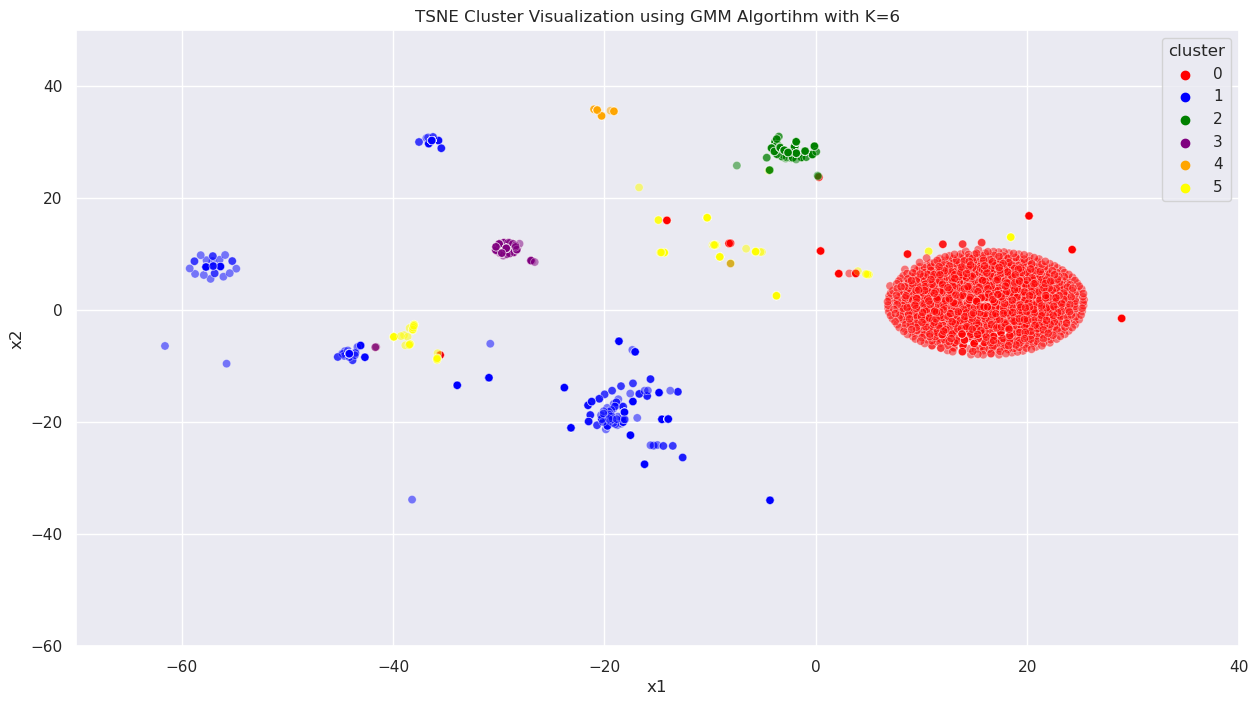

In [127]:
fig, ax = plt.subplots(figsize=(15,8))
#custom color palette, to distinguish beter the clusters
cluster_colors = ["red", "blue", "green", "purple", "orange", "yellow"] #"brown", "teal", "black"]

sns.scatterplot(data = df_tsne_gmm, x='x1', y='x2', hue='cluster',  palette=cluster_colors, legend="full", alpha=0.5)
ax.set_title('TSNE Cluster Visualization using GMM Algortihm with K=6')

ax.set_xlim([-70, 40])  
ax.set_ylim([-60, 50])  

**3.4. Cluster analysis. Analyze the characteristics of each cluster. This might involve examining the most frequent words in each cluster (try word cloud). Try to understand which are the most
representative.**

##### Most Frequent Words for the K-Means Cluster Algorithm

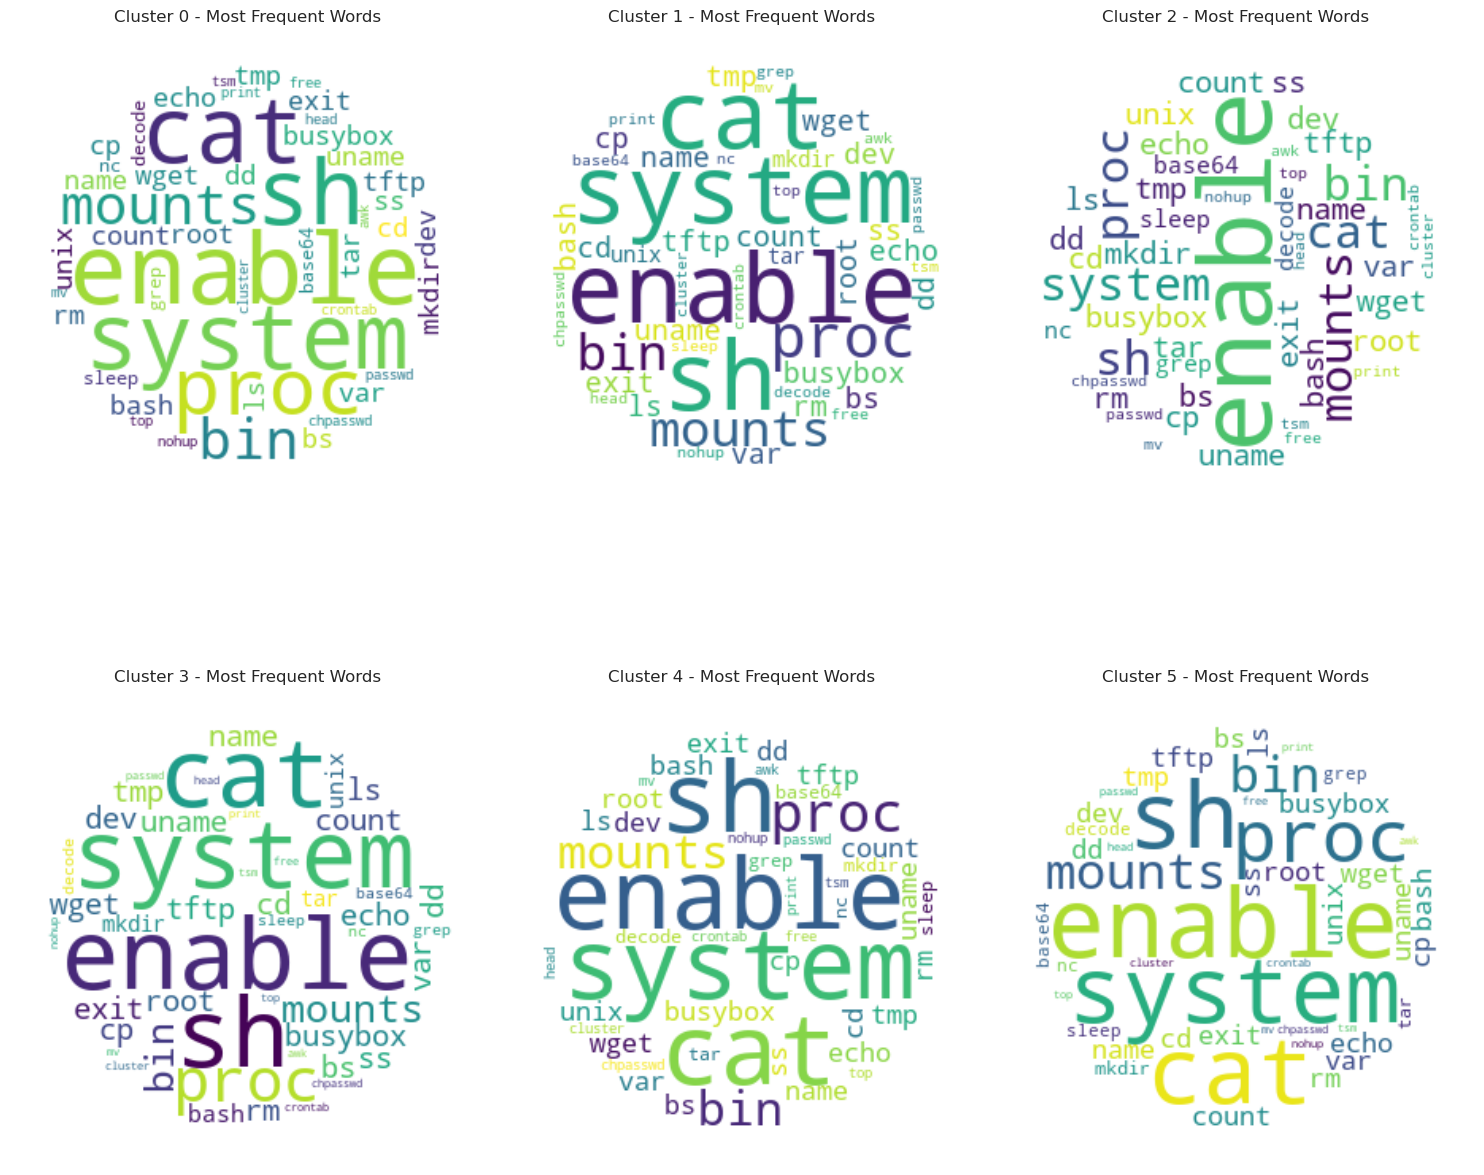

In [101]:
optimal_clusters = 6  # Optimal number of clusters

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
    
for cluster in range(optimal_clusters):
    cluster_data = df_cluster[df_cluster['cluster'] == cluster]
    cluster_text = ' '.join(cluster_data)
    
    # Circle mask
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    
    # Generate WordCloud
    wordcloud = WordCloud(width=400, 
                          height=400, 
                          background_color='white', 
                          colormap = "viridis", 
                          mask = mask,
                          contour_color='grey').generate(cluster_text)
    
    # Plot WordCloud on the corresponding subplot
    row_index = cluster // 3
    col_index = cluster % 3
    
    # plt.figure(figsize=(6, 4))
    axes[row_index, col_index].imshow(wordcloud, interpolation='bilinear')
    axes[row_index, col_index].set_title(f'Cluster {cluster} - Most Frequent Words')
    axes[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

##### Most Frequent Words for the GMM Cluster Algorithm

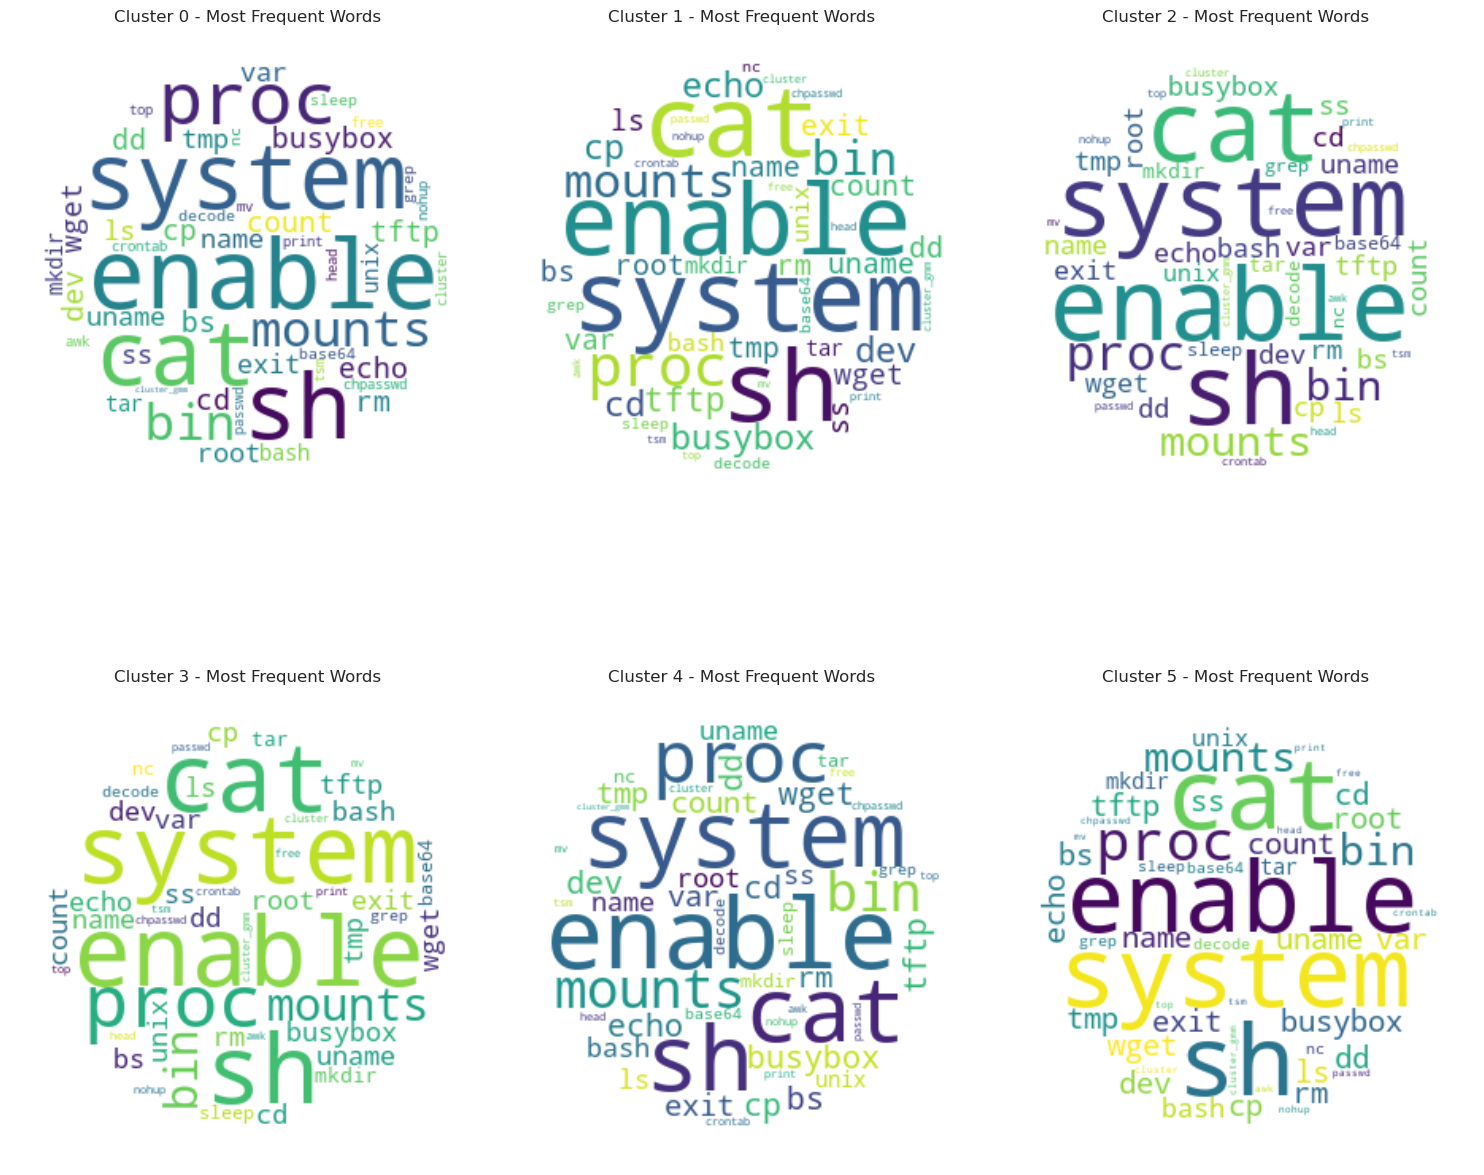

In [129]:
optimal_clusters = 6  # Optimal number of clusters

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
for cluster in range(optimal_clusters):
    cluster_data = df_cluster[df_cluster['cluster_gmm'] == cluster]
    cluster_text = ' '.join(cluster_data)
    
    # Circle mask
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    
    # Generate WordCloud
    wordcloud = WordCloud(width=400, 
                          height=400, 
                          background_color='white', 
                          colormap = "viridis", 
                          mask = mask,
                          contour_color='grey').generate(cluster_text)
    
    # Plot WordCloud on the corresponding subplot
    row_index = cluster // 3
    col_index = cluster % 3
    
    # axes settings 
    axes[row_index, col_index].imshow(wordcloud, interpolation='bilinear')
    axes[row_index, col_index].set_title(f'Cluster {cluster} - Most Frequent Words')
    axes[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

**3.5. Do clusters reflect intent division, i.e., are the clusters homogeneous in terms of intents? How are intents divided into the clusters?**

In [136]:
# Adding the Fingerprint column to df_cluster 
df_cluster['Set_Fingerprint'] = df_features_tfidf_sampled['Set_Fingerprint']
#df_cluster

In [148]:
df_cluster_exploded = df_cluster.explode("Set_Fingerprint").reset_index()
df_cluster_exploded = df_cluster_exploded.drop(columns=['index','cluster_gmm'])

# # We should use the stardardized data (X and y features)
labels_intents = df_cluster_exploded["Set_Fingerprint"]
cluster_labels = df_cluster_exploded["cluster"]

##### Intents Division into the K-Means Clusters

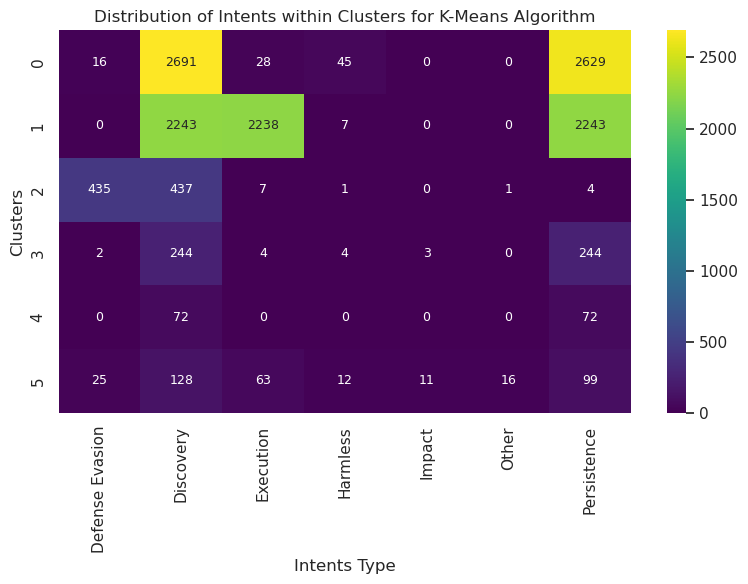

In [150]:
# Predicted cluster labels for the optimal number of clusters
# Creating a data frame with the original labels and the labels predicted by the cluster
# and regrouping them according to the cluster's label
cluster_df = pd.DataFrame({'Set_Fingerprint': labels_intents, 'Cluster': cluster_labels})
cluster_counts = cluster_df.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

# Cluster distribution
cluster_counts

# Distribution plot of intents within the Clusters
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_counts, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 9})
plt.title('Distribution of Intents within Clusters for K-Means Algorithm')
plt.xlabel('Intents Type')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()

##### Intents Division into the GMM Clusters

In [153]:
df_cluster_exploded = df_cluster.explode("Set_Fingerprint").reset_index()
df_cluster_exploded = df_cluster_exploded.drop(columns=['index','cluster'])

# # We should use the stardardized data (X and y features)
labels_intents_gmm = df_cluster_exploded["Set_Fingerprint"]
cluster_labels_gmm = df_cluster_exploded["cluster_gmm"]

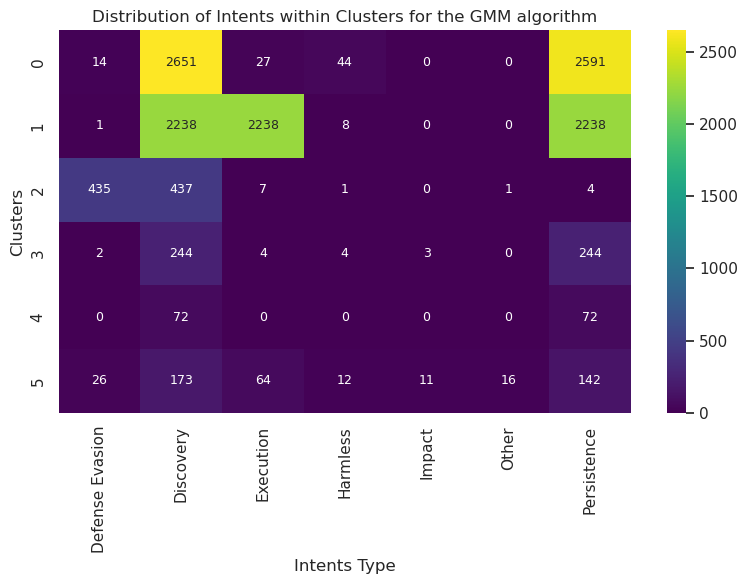

In [154]:
# Predicted cluster labels for the optimal number of clusters
# Creating a data frame with the original labels and the labels predicted by the cluster
# and regrouping them according to the cluster's label
cluster_gmm_df = pd.DataFrame({'Set_Fingerprint': labels_intents_gmm, 'Cluster': cluster_labels_gmm})
cluster_counts_gmm = cluster_gmm_df.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

# Cluster distribution
cluster_counts_gmm

# Distribution plot of intents within the Clusters
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_counts_gmm, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 9})
plt.title('Distribution of Intents within Clusters for the GMM algorithm')
plt.xlabel('Intents Type')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()

**3.6. Find clusters of similar attacks, study their sessions and try to associate with them specific categories of attacks (more fine grained than the ones of MITRE ATT&CK Tactics). As an example, see the image below, where we perform a similar exercise (through graph community detections). NOTE: you do not have to do this exercise for all the clusters, but only on some examples.**